##Задача 9.2

Плотность вероятности:
$$
P = \prod_{i=0}^{n} \frac{1}{\sqrt{2\pi(i+1)\sigma^2}} \prod_{i=0}^{n} \exp{-\frac{(x_i - \beta_1 - i\beta_2)^2}{2(i+1)\sigma^2}}
$$

Функция правдоподобия:
$$
L = -\frac{1}{2}\sum_{i=0}^{n}\ln(2\pi(i+1)\sigma^2) - \sum_{i=0}^n \frac{(x_i - \beta_1 - i\beta_2)^2}{2(i+1)\sigma^2} \to max
$$

Найдем производные по $\beta_1$ и $\beta_2$ и приравняем их к нулю:
$$
\begin{equation*}
 \begin{cases}
   \sum_{i=0}^n \frac{x_i - \beta_1 - i\beta_2}{i+1} = 0
   \\
   \sum_{i=0}^n \frac{i(x_i - \beta_1 - i\beta_2)}{i+1} = 0
 \end{cases}
\end{equation*}
$$

Введем следующие обозначения:
$$
a = \sum_{i=0}^n \frac{1}{i+1}
$$
$$
b = \sum_{i=0}^n \frac{i}{i+1}
$$
$$
c = \sum_{i=0}^n \frac{i^2}{i+1}
$$
$$
f_1 = \sum_{i=0}^n \frac{x_i}{i+1}
$$
$$
f_2 = \sum_{i=0}^n \frac{ix_i}{i+1}
$$

Тогда систему можно переписать следующим образом:
$$
\begin{pmatrix} a & b \\ b & c \end{pmatrix}
\begin{pmatrix} \beta_1 \\ \beta_2 \end{pmatrix} =
\begin{pmatrix} f_1 \\ f_2 \end{pmatrix}
$$

Тогда
$$
\begin{pmatrix} \beta_1 \\ \beta_2 \end{pmatrix} = (Q^TQ)^{-1}Q^TF,
$$
где
$$
Q = \begin{pmatrix} a & b \\ b & c \end{pmatrix}
$$
$$
F = \begin{pmatrix} f_1 \\ f_2 \end{pmatrix}
$$

Если продифференцировать функцию правдоподобия по $\sigma^2$, то можно найти:
$$
\sigma^2 = \frac{1}{n + 1} \sum_{i=0}^n \frac{(x_i - \beta_1 - i\beta_2)^2}{i+1}
$$

In [4]:
# encoding: utf-8
%matplotlib inline

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

def load_data():
    return [float(x) for x in open('data.txt')]

def linear_regression(Q, F):
    I = inv(np.dot(np.transpose(Q), Q))
    return np.dot(np.dot(I, np.transpose(Q)), F)

def calc_betas(data):
    N = len(data)
    a = np.sum([1.0 / (i + 1) for i in range(N)])
    b = np.sum([float(i) / (i + 1) for i in range(N)])
    c = np.sum([float(i * i) / (i + 1) for i in range(N)])
    f1 = np.sum([float(x) / (i + 1) for i, x in zip(range(N), data)])
    f2 = np.sum([float(x) * i / (i + 1) for i, x in zip(range(N), data)])
    return linear_regression([[a, b], [b, c]], [[f1], [f2]])

data = load_data()
N = len(data)
betas = calc_betas(data)
beta_1 = betas[0][0]
beta_2 = betas[1][0]

Построим на графике пары точек $(i, x_i)$ и прямую $\beta_1 + i\beta_2$:

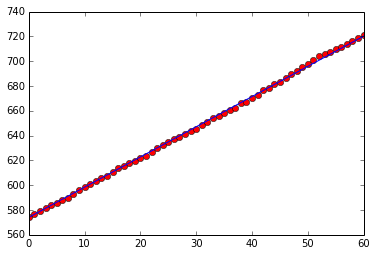

In [5]:
plt.plot(range(N), data, 'ro')
plt.plot(range(N), beta_1 + np.array(range(N)) * beta_2)
plt.show()

Посчитаем оптимальные сигмы и запишем ответ в файл:

In [7]:
diff = np.absolute(
    beta_1 + np.array(range(N)) * beta_2 - data)
sigma_2 = np.sum(
    [x / (i + 1) for i, x in zip(range(N), np.square(diff))]) / N
sigma_t_2 = sigma_2 / beta_2 ** 2

print sigma_2, sigma_t_2
f = open('output.txt', 'w')
f.write('%f %f %f %f\n' % (beta_1, beta_2, sigma_2, sigma_t_2))
f.close()

0.0442748949416 0.00746766060279


Также интересно проанализировать как отличается оптимальная прямая в случае, когда ошибки не "накапливаются", то есть когда дисперсия ошибки не возрастает с номером замера.

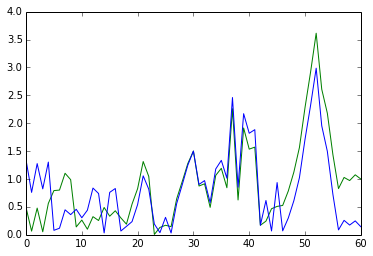

In [8]:
def calc_suboptimal(data):
    N = len(data)
    a = N
    b = np.sum([float(i) for i in range(N)])
    c = np.sum([float(i * i) for i in range(N)])
    f1 = np.sum([float(x) for i, x in zip(range(N), data)])
    f2 = np.sum([float(x) * i for i, x in zip(range(N), data)])
    return linear_regression([[a, b], [b, c]], [[f1], [f2]])

sub_opt = calc_suboptimal(data)
sub_opt_diff = np.absolute(
    sub_opt[0] + np.array(range(N)) * sub_opt[1] - data)

plt.plot(range(N), diff, color='g')
plt.plot(range(N), sub_opt_diff, color='b')
plt.show()

На графике изображен модуль отклонения $x_i$ от оптимальной прямой -- зеленым цветом для условия задачи и синим цветом для случая постоянной дисперсии. Заметим, что в случае накапливающейся ошибки, модуль отклонения при малых значениях $i$ меньше (то есть зеленая кривая лежит ниже), а при больших $i$ наоборот. Это объясняется тем, что в случае накапливающейся ошибки модель меньше "штрафует" за ошибку при больших $i$, в то время как в случае постоянной дисперсии "штраф" за ошибку при всех $i$ одинаков.